# Credit Risk Modeling with Logistic Regression (Python)
## Objectif
### Prédire le risque de défaut de clients bancaires à partir de données financières et comportementales.

### Auteur : Construit par Arsène DJIROUE - V1.0 - Août  2025

# Régression Logistique

In [9]:
# Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, brier_score_loss
from imblearn.over_sampling import SMOTE  # pour gérer le déséquilibre pour le problème d’ambulance.

In [11]:
# Importer le dataset
dataset = pd.read_csv(r"C:\Users\Utilisateur\OneDrive\Bureau\Projet Github\Python\Base de données\base_credit.csv")

In [29]:
# Visualisation des données
dataset.head(5)


,client_id,age,nb_enfants,revenu_mensuel,patrimoine,anciennete_client,taux_endettement,montant_credit,duree_credit,historique_impayes,score_interne,defaut,situation_familiale_Divorcé,situation_familiale_Marié,situation_familiale_Veuf,type_contrat_CDI,type_contrat_Indépendant,type_contrat_Retraité
0,1,56,0,2090.19,109206.99,3,34.56,22187.15,36,0,632,1,False,False,False,True,False,False
1,2,69,0,2343.87,69684.88,27,21.79,41277.17,24,0,599,0,False,True,False,True,False,False
2,3,46,3,1671.92,82658.44,27,7.10,1000.00,12,0,427,0,False,True,False,False,True,False
3,4,32,2,2831.97,116707.49,24,34.58,34556.77,240,0,423,0,False,True,False,True,False,False
4,5,60,1,1161.38,67307.35,2,39.82,31136.58,120,1,417,0,False,True,False,False,False,True


In [13]:
# Description de la base de données

print(dataset.describe())

         client_id           age    nb_enfants  revenu_mensuel     patrimoine  \
count  10000.00000  10000.000000  10000.000000    10000.000000   10000.000000   
mean    5000.50000     46.683500      1.193400     2517.702724   52377.543559   
std     2886.89568     16.717963      1.085318      960.858954   36475.158377   
min        1.00000     18.000000      0.000000      800.000000       0.000000   
25%     2500.75000     32.000000      0.000000     1830.097500   23484.615000   
50%     5000.50000     46.000000      1.000000     2493.590000   50415.235000   
75%     7500.25000     61.000000      2.000000     3157.210000   77723.235000   
max    10000.00000     75.000000      7.000000     6599.450000  189009.580000   

       anciennete_client  taux_endettement  montant_credit  duree_credit  \
count       10000.000000      10000.000000    10000.000000  10000.000000   
mean           14.585700         30.162371    20861.090682    112.640400   
std             8.672645         14.630365

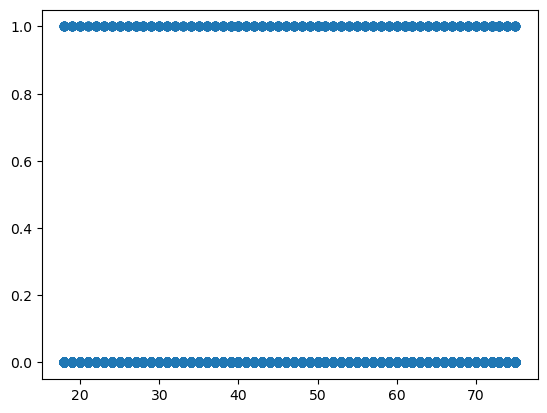

In [14]:
# Afficher le dataset (age - defaut )

plt.scatter(dataset.age,dataset.defaut)

In [15]:
# sélectionner uniquement les colonnes numériques
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

# remplir les NaN avec la moyenne de chaque colonne numérique
dataset[numerical_cols] = dataset[numerical_cols].fillna(dataset[numerical_cols].mean())


In [16]:
# Traitement des valeurs manquantes
for col in ["situation_familiale", "type_contrat"]: # valeurs catégorielles
    dataset[col] = dataset[col].fillna("Inconnu")


In [17]:
# Encodage variables catégorielles
dataset = pd.get_dummies(dataset, columns=['situation_familiale','type_contrat'], drop_first=True)

In [18]:
# Séparation features / target
X = dataset.drop(['client_id','defaut'], axis=1)  # on enlève l'ID
y = dataset['defaut']

In [19]:
# Gérer le problème ambulance

print("Répartition des classes :")
print(y.value_counts(normalize=True))

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

Répartition des classes :
defaut
0    0.9265
1    0.0735
Name: proportion, dtype: float64


In [20]:
# Séparation de la base de donnée : train & test

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


In [21]:
# Standardisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Construction du Modèle de régrssion logistique

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [23]:
# Faire de nouvelles prédictions

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [24]:
# Évaluation du modèle
## AUC-ROC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC: {auc:.3f}")

AUC-ROC: 0.809


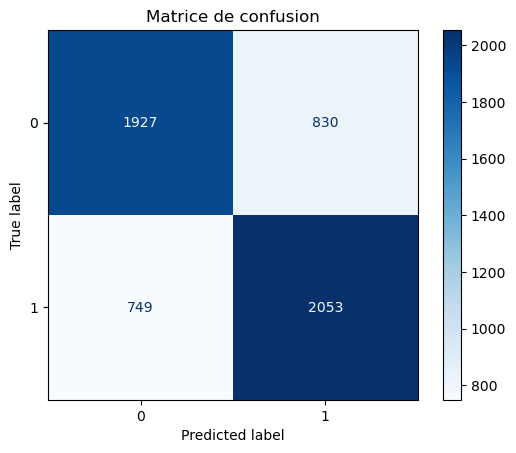

In [25]:
# La Matrice de confusion

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

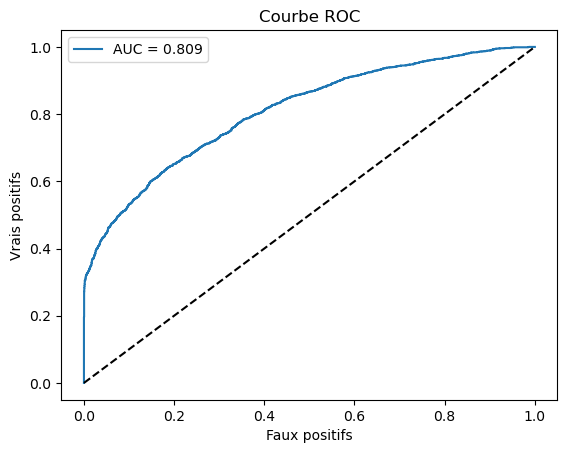

In [26]:
# La Courbe ROC

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("Faux positifs")
plt.ylabel("Vrais positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

Brier Score: 0.178


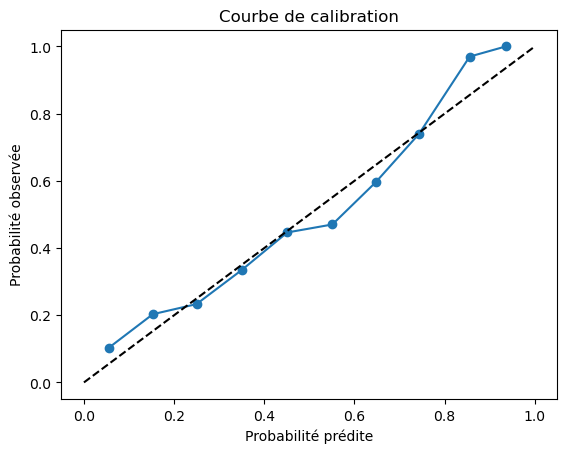

In [27]:
# Calibration du modèle

brier = brier_score_loss(y_test, y_proba)
print(f"Brier Score: {brier:.3f}")

from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("Probabilité prédite")
plt.ylabel("Probabilité observée")
plt.title("Courbe de calibration")
plt.show()

Top features influentes :
                        feature      coef  abs_coef
13             type_contrat_CDI  0.932888  0.932888
14     type_contrat_Indépendant  0.847509  0.847509
11    situation_familiale_Marié  0.649394  0.649394
15        type_contrat_Retraité  0.518484  0.518484
10  situation_familiale_Divorcé  0.427449  0.427449
12     situation_familiale_Veuf  0.382941  0.382941
1                    nb_enfants -0.347873  0.347873
5              taux_endettement  0.323091  0.323091
8            historique_impayes -0.142195  0.142195
9                 score_interne -0.135690  0.135690


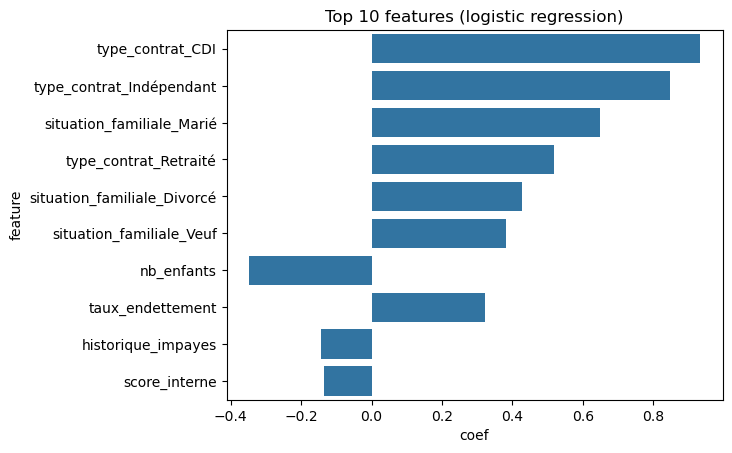

In [28]:
# Analyse des coefficients

coefficients = pd.DataFrame({
    'feature': X.columns,
    'coef': model.coef_[0]
})
coefficients['abs_coef'] = coefficients['coef'].abs()
coefficients = coefficients.sort_values(by='abs_coef', ascending=False)

print("Top features influentes :")
print(coefficients.head(10))

sns.barplot(x='coef', y='feature', data=coefficients.head(10))
plt.title("Top 10 features (logistic regression)")
plt.show()